In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

This dataset contains daily pickup data for 329 FHV (for-hire vehicle) companies from January 2015 through August 2015.

In [2]:
data = pd.read_csv('../data/other-FHV-services_jan-aug-2015.csv')

In [3]:
data.head()

,Base Number,Base Name,Pick Up Date,Number of Trips,Number of Vehicles
0,B00013,LOVE CORP CAR INC,01/01/2015,26,17
1,B00014,NY ONE CORP CAR INC,01/01/2015,45,24
2,B00029,COMMUNITY CAR SVC CORP,01/01/2015,731,36
3,B00053,CHARGE AND RIDE INC,01/01/2015,10,9
4,B00095,LIBERTY CAR SERVICE INC.,01/01/2015,814,62


In [4]:
data.shape

(26181, 5)

In [5]:
data.describe()

,Base Number,Base Name,Pick Up Date,Number of Trips,Number of Vehicles
count,26181,26181,26181,26181,26181
unique,334,329,243,1906,445
top,B02147,"MITA LIMOUSINE, INC.",05/13/2015,1,-
freq,212,212,212,988,1716


In [6]:
data.isnull().sum()

Base Number           0
Base Name             0
Pick Up Date          0
Number of Trips       0
Number of Vehicles    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26181 entries, 0 to 26180
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Base Number         26181 non-null  object
 1   Base Name           26181 non-null  object
 2   Pick Up Date        26181 non-null  object
 3   Number of Trips     26181 non-null  object
 4   Number of Vehicles  26181 non-null  object
dtypes: object(5)
memory usage: 1022.8+ KB


In [8]:
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
}

In [9]:
data['Pick Up Date'] = pd.to_datetime(data['Pick Up Date'])

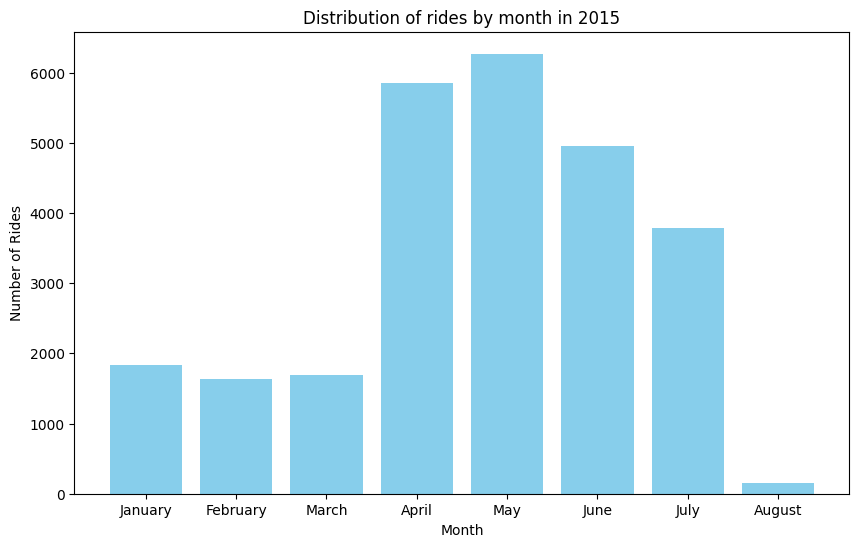

In [10]:
data['Month'] = data['Pick Up Date'].dt.month
months_data = data['Month'].value_counts().rename(index=month_mapping)
months_data = months_data.reindex(index=list(month_mapping.values()))

plt.figure(figsize=(10, 6))
plt.bar(months_data.index, months_data.values, color='skyblue')
plt.title('Distribution of rides by month in 2015')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.show()

We have the most data for April, May, June and July, slightly less for the first three months of the year, while the amount of data for August is negligible.

In [11]:
data

,Base Number,Base Name,Pick Up Date,Number of Trips,Number of Vehicles,Month
0,B00013,LOVE CORP CAR INC,2015-01-01,26,17,1
1,B00014,NY ONE CORP CAR INC,2015-01-01,45,24,1
2,B00029,COMMUNITY CAR SVC CORP,2015-01-01,731,36,1
3,B00053,CHARGE AND RIDE INC,2015-01-01,10,9,1
4,B00095,LIBERTY CAR SERVICE INC.,2015-01-01,814,62,1
...,...,...,...,...,...,...
26176,B02666,"D.L.C. LIMOUSINE SERVICE, INC.",2015-08-30,4,3,8
26177,B01313,JOY CAR SERVICES INC.,2015-08-31,14,14,8
26178,B01509,"BRUNWISH ENTERPRISES,LTD.",2015-08-31,736,63,8
26179,B01614,R TRANSPORT INC,2015-08-31,45,8,8


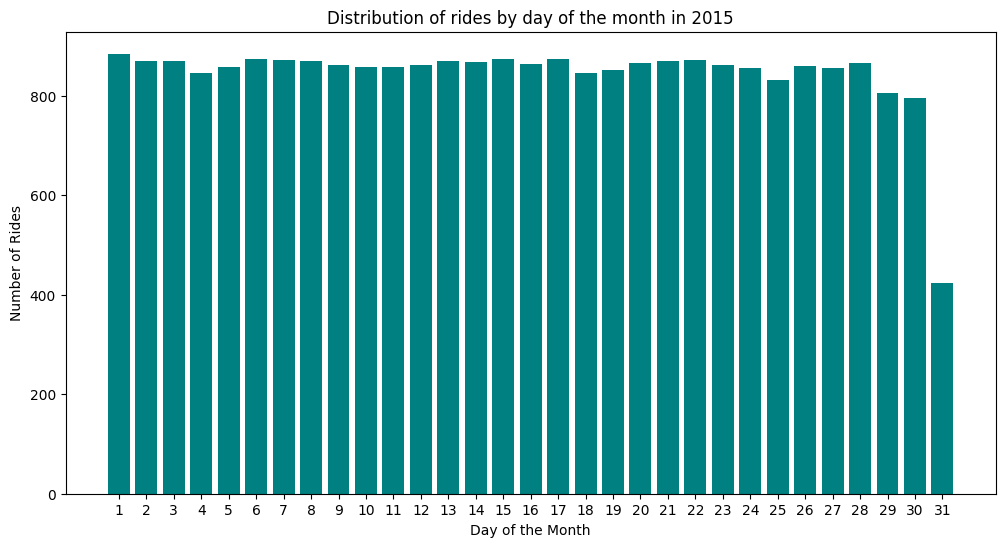

In [12]:
data['Day'] = data['Pick Up Date'].dt.day

days_count = data['Day'].value_counts().sort_index()

days_count = days_count.reindex(range(1, 32), fill_value=0)

plt.figure(figsize=(12, 6))
plt.bar(days_count.index, days_count.values, color='teal')
plt.title('Distribution of rides by day of the month in 2015')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Rides')
plt.xticks(range(1, 32))  
plt.show()

This barplot doesn't help our analysis much, because the number of rides is relatively evenly distributed by day, except of course the 31st, because not all months have 31 days.

In [13]:
data

,Base Number,Base Name,Pick Up Date,Number of Trips,Number of Vehicles,Month,Day
0,B00013,LOVE CORP CAR INC,2015-01-01,26,17,1,1
1,B00014,NY ONE CORP CAR INC,2015-01-01,45,24,1,1
2,B00029,COMMUNITY CAR SVC CORP,2015-01-01,731,36,1,1
3,B00053,CHARGE AND RIDE INC,2015-01-01,10,9,1,1
4,B00095,LIBERTY CAR SERVICE INC.,2015-01-01,814,62,1,1
...,...,...,...,...,...,...,...
26176,B02666,"D.L.C. LIMOUSINE SERVICE, INC.",2015-08-30,4,3,8,30
26177,B01313,JOY CAR SERVICES INC.,2015-08-31,14,14,8,31
26178,B01509,"BRUNWISH ENTERPRISES,LTD.",2015-08-31,736,63,8,31
26179,B01614,R TRANSPORT INC,2015-08-31,45,8,8,31


In [14]:
data['DayOfWeek'] = data['Pick Up Date'].dt.day_of_week

In [15]:
day_mapping = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 0: 'Sunday'}
data['Month'] = data['Month'].map(month_mapping)
data['DayOfWeek'] = data['DayOfWeek'].map(day_mapping)

In [16]:
data

,Base Number,Base Name,Pick Up Date,Number of Trips,Number of Vehicles,Month,Day,DayOfWeek
0,B00013,LOVE CORP CAR INC,2015-01-01,26,17,January,1,Wednesday
1,B00014,NY ONE CORP CAR INC,2015-01-01,45,24,January,1,Wednesday
2,B00029,COMMUNITY CAR SVC CORP,2015-01-01,731,36,January,1,Wednesday
3,B00053,CHARGE AND RIDE INC,2015-01-01,10,9,January,1,Wednesday
4,B00095,LIBERTY CAR SERVICE INC.,2015-01-01,814,62,January,1,Wednesday
...,...,...,...,...,...,...,...,...
26176,B02666,"D.L.C. LIMOUSINE SERVICE, INC.",2015-08-30,4,3,August,30,Saturday
26177,B01313,JOY CAR SERVICES INC.,2015-08-31,14,14,August,31,Sunday
26178,B01509,"BRUNWISH ENTERPRISES,LTD.",2015-08-31,736,63,August,31,Sunday
26179,B01614,R TRANSPORT INC,2015-08-31,45,8,August,31,Sunday


In [17]:
data_agg = data.groupby(['Month', 'DayOfWeek']).size().reset_index(name='count')

In [18]:
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

data_agg['Month'] = pd.Categorical(data_agg['Month'], categories=months_order, ordered=True)
data_agg['DayOfWeek'] = pd.Categorical(data_agg['DayOfWeek'], categories=days_order, ordered=True)

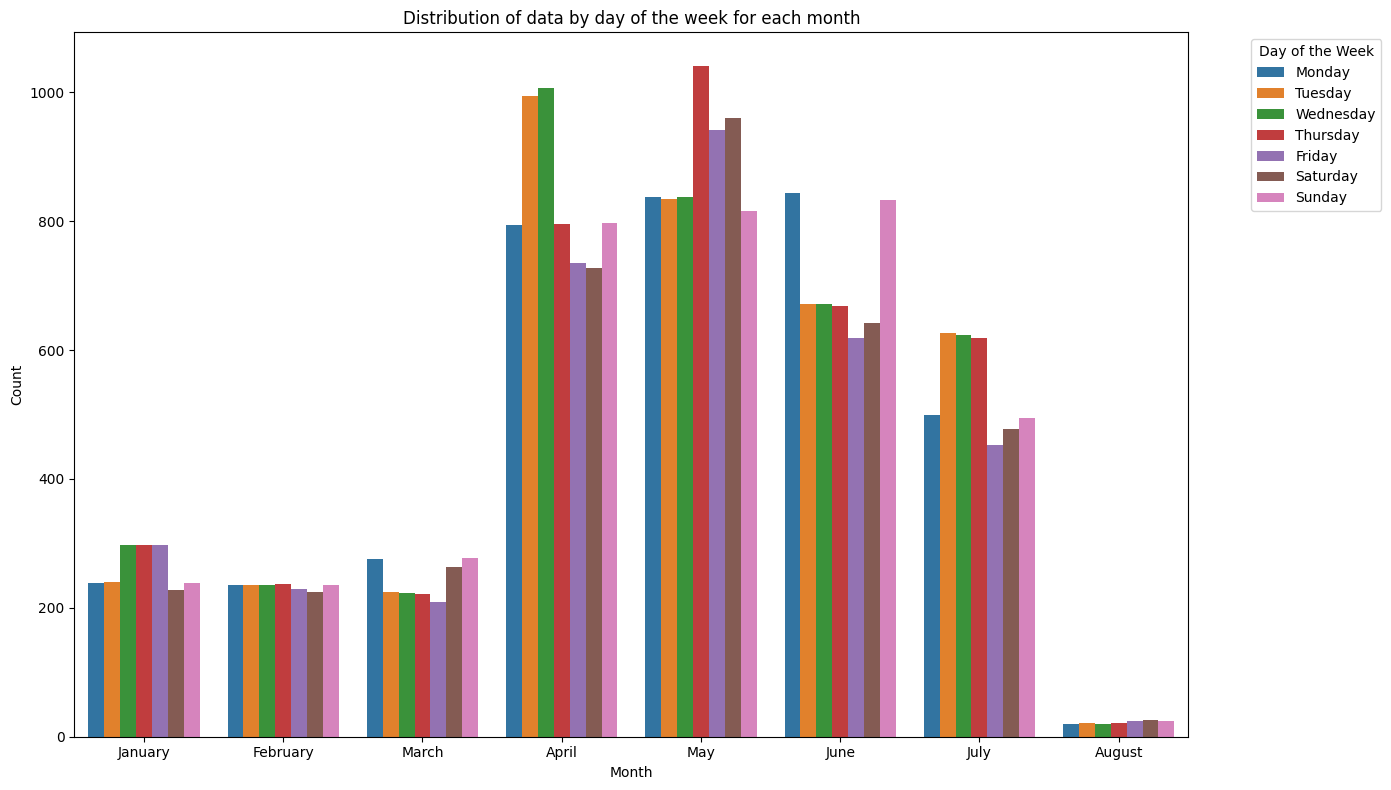

In [19]:
plt.figure(figsize=(14, 8))

sns.barplot(data=data_agg, x='Month', y='count', hue='DayOfWeek', hue_order=days_order, palette='tab10')

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Distribution of data by day of the week for each month')
plt.legend(title='Day of the Week', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()

This plot visualizes FHV pickup counts by day of the week for each month from January to August. 

There is a clear trend of increased pickups during the midweek days (**Tuesday through Thursday**), indicating higher demand for FHV services. This could be attributed to regular commuting patterns, midweek business activities, or other scheduled events during these days.

**Monday** and **Friday** also show substantial activity but are generally slightly lower than the midweek peak. This might suggest a tapering of activity as people start and end their workweek.

**Saturday** and **Sunday** consistently show lower pickup counts across most months. This reduction could indicate that the demand for FHVs on weekends is significantly less compared to weekdays, possibly due to fewer work-related trips and different social patterns.

The relative distribution remains consistent across months, showing that the demand pattern by day of the week does not fluctuate drastically from month to month. This consistency is crucial for predicting demand and planning resource allocation efficiently.

In [20]:
pd.value_counts(data['Base Name'])

Base Name
MITA LIMOUSINE, INC.               212
BELL RADIO INC                     212
NY 88 EXPRESS CORP.                182
JOY CAR SERVICES INC.              182
LOVE CORP CAR INC                  181
                                  ... 
LAPUMA TRANSPORTATION GROUP,LLC      4
MALCOLM LIMO EXPRESS CORP.           4
OLS LIMOUSINE SERVICE INC.           4
CHEERS DISPATCH,INC.                 2
B.O.B EXPRESS INC                    2
Name: count, Length: 329, dtype: int64

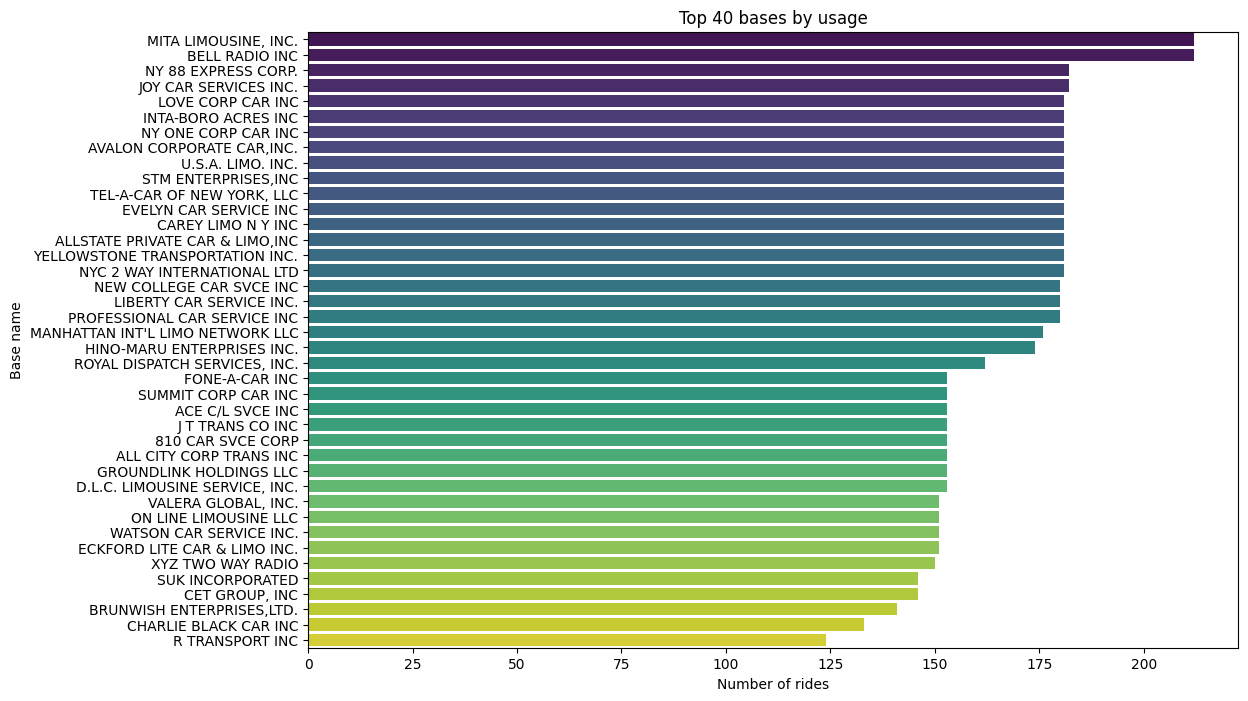

In [21]:
base_name_counts = pd.value_counts(data['Base Name'])

top_40_bases = base_name_counts.head(40)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_40_bases.values, y=top_40_bases.index, palette='viridis', hue=top_40_bases.index, legend=False)
plt.title('Top 40 bases by usage')
plt.xlabel('Number of rides')
plt.ylabel('Base name')
plt.show()

C:\Users\mmarkovic\AppData\Local\Temp\ipykernel_10308\440087044.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Trips', y='Pick Up Date', data=top_20_dates, palette='viridis')


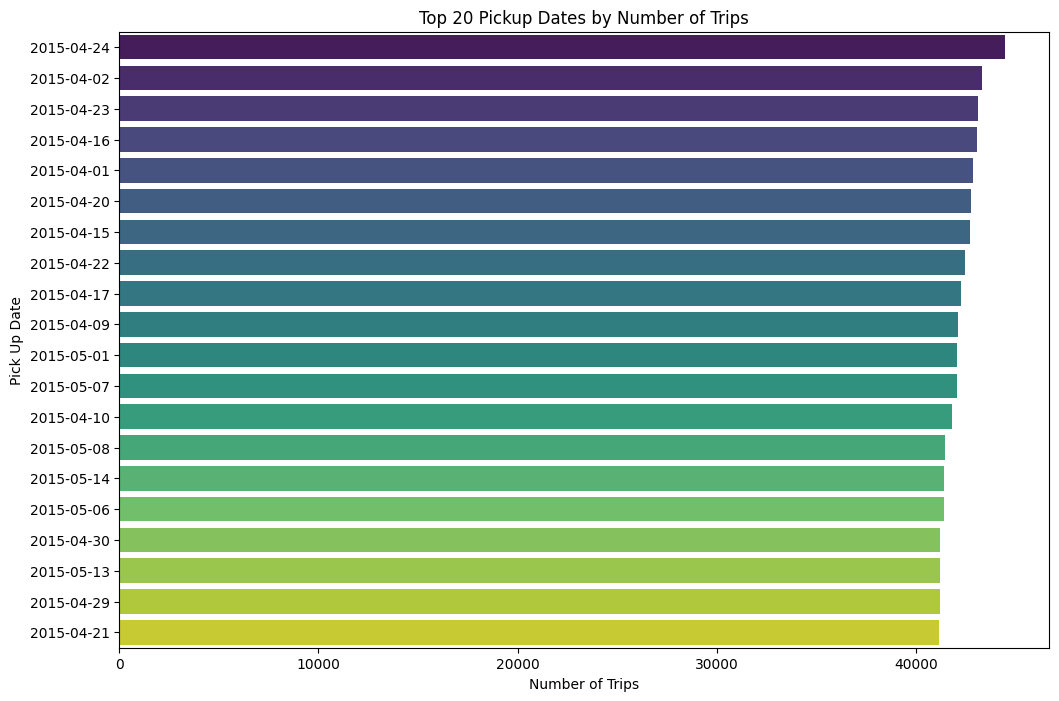

In [22]:
data['Pick Up Date'] = pd.to_datetime(data['Pick Up Date'])

# Remove commas and split by spaces if necessary, then sum
data['Number of Trips'] = data['Number of Trips'].apply(lambda x: sum(int(i.replace(',', '')) for i in x.split()))
# print(data)

# Group by 'Pick Up Date' and sum the 'Number of Trips'
date_trips_sum = data.groupby('Pick Up Date')['Number of Trips'].sum().reset_index()

# Sort the results by 'Number of Trips' in descending order and pick the top 20
top_20_dates = date_trips_sum.sort_values(by='Number of Trips', ascending=False).head(20)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Trips', y='Pick Up Date', data=top_20_dates, palette='viridis')
plt.title('Top 20 Pickup Dates by Number of Trips')
plt.xlabel('Number of Trips')
plt.ylabel('Pick Up Date')
plt.show()